In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Four Containers Analysis

In [3]:
column_names = ['Time',	'Model Name', 'File Name', 'Propagation Delay (s)', 'Processing Delay (ms)', 'E2E Delay (s)', 'location', 'core']

In [4]:
df4_prokube = pd.read_csv('four_containers/ClientStat_1713523707.3637729.csv', header=None, names=column_names)
df4_costgreedy = pd.read_csv('four_containers/ClientStat_1714057800.8877995_CostGreedy.csv', header=None, names=column_names)
df4_latencygreedy = pd.read_csv('four_containers/ClientStat_1714063588.640397_LatencyGreedy.csv', header=None, names=column_names)
df4_gekube = pd.read_csv('four_containers/ClientStat_1720910159.5720313_GeKube.csv' ,header=None, names=column_names)

In [5]:
print(f'ProKube: {df4_prokube.shape}, Cost: {df4_costgreedy.shape}, Latency: {df4_latencygreedy.shape}, GeKube: {df4_gekube.shape}')

ProKube: (404, 8), Cost: (404, 8), Latency: (404, 8), GeKube: (404, 8)


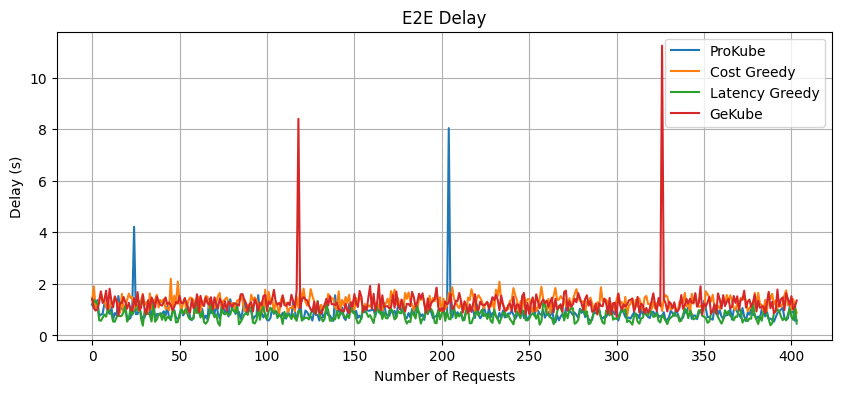

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df4_prokube.index, df4_prokube['E2E Delay (s)'], label='ProKube')
plt.plot(df4_costgreedy.index, df4_costgreedy['E2E Delay (s)'], label='Cost Greedy')
plt.plot(df4_latencygreedy.index, df4_latencygreedy['E2E Delay (s)'], label='Latency Greedy')
plt.plot(df4_gekube.index, df4_gekube['E2E Delay (s)'], label='GeKube')
plt.title('E2E Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Delay (s)')
plt.legend()
plt.grid(True)
#plt.ylim([0,2.5])
plt.show()

In [8]:
sla4_prokube = df4_prokube[df4_prokube['E2E Delay (s)'] > 1].count()/ df4_prokube['E2E Delay (s)'].count()
sla4_cost = df4_costgreedy[df4_costgreedy['E2E Delay (s)'] > 1].count()/ df4_costgreedy['E2E Delay (s)'].count()
sla4_latency = df4_latencygreedy[df4_latencygreedy['E2E Delay (s)'] > 1].count()/ df4_latencygreedy['E2E Delay (s)'].count()
sla4_gekube = df4_gekube[df4_gekube['E2E Delay (s)'] > 1].count()/ df4_gekube['E2E Delay (s)'].count()
print(f'Pro-SLA: {sla4_prokube}, Cost-SLA: {sla4_cost}, Latency-SLA: {sla4_latency}, GeKube {sla4_gekube}')

Pro-SLA: Time                     0.212871
Model Name               0.212871
File Name                0.212871
Propagation Delay (s)    0.212871
Processing Delay (ms)    0.212871
E2E Delay (s)            0.212871
location                 0.212871
core                     0.212871
dtype: float64, Cost-SLA: Time                     0.846535
Model Name               0.846535
File Name                0.846535
Propagation Delay (s)    0.846535
Processing Delay (ms)    0.846535
E2E Delay (s)            0.846535
location                 0.846535
core                     0.846535
dtype: float64, Latency-SLA: Time                     0.133663
Model Name               0.133663
File Name                0.133663
Propagation Delay (s)    0.133663
Processing Delay (ms)    0.133663
E2E Delay (s)            0.133663
location                 0.133663
core                     0.133663
dtype: float64, GeKube Time                     0.821782
Model Name               0.821782
File Name                0.82

In [9]:
sla4_prokube_half = df4_prokube[(df4_prokube['E2E Delay (s)'] > 1 ) & (df4_prokube['core'] == 500 )].count()/ df4_prokube[df4_prokube['core'] == 500].count()
sla4_cost_half = df4_costgreedy[(df4_costgreedy['E2E Delay (s)'] > 1 ) & (df4_costgreedy['core'] == 500 )].count()/ df4_costgreedy[df4_costgreedy['core'] == 500].count()
print(f'Pro-SLA-Half: {sla4_prokube_half}, Cost-SLA-Half: {sla4_cost_half}')

Pro-SLA-Half: Time                     0.723404
Model Name               0.723404
File Name                0.723404
Propagation Delay (s)    0.723404
Processing Delay (ms)    0.723404
E2E Delay (s)            0.723404
location                 0.723404
core                     0.723404
dtype: float64, Cost-SLA-Half: Time                     0.846535
Model Name               0.846535
File Name                0.846535
Propagation Delay (s)    0.846535
Processing Delay (ms)    0.846535
E2E Delay (s)            0.846535
location                 0.846535
core                     0.846535
dtype: float64


In [10]:
server_columns = ['migrations', 'scalings', 'cost']
df4_prokube_server = pd.read_csv('four_containers/ServerStat_1713523707.3637729.csv', header=None, names=server_columns)
df4_cost_server = pd.read_csv('four_containers/ServerStat_1714057800.8877995_CostGreedy.csv', header=None, names=server_columns)
df4_latency_server = pd.read_csv('four_containers/ServerStat_1714063588.640397_LatencyGreedy.csv', header=None, names=server_columns)
df4_gekube_server = pd.read_csv('four_containers/ServerStat_1720910159.5720313_GeKube.csv', header=None, names=server_columns)
print(f'Pro-Server: {df4_prokube_server.shape}, Cost-Serevr: {df4_cost_server.shape}, Latency-Server: {df4_latency_server.shape}, {df4_gekube_server.shape}')

Pro-Server: (101, 3), Cost-Serevr: (101, 3), Latency-Server: (101, 3), (101, 3)


In [11]:
pro4_migrations = round(df4_prokube_server['migrations'].sum()/df4_prokube_server['migrations'].count(),ndigits=2)
cost4_migrations = round(df4_cost_server['migrations'].sum()/df4_cost_server['migrations'].count(),ndigits=2)
latency4_migrations = round(df4_latency_server['migrations'].sum()/df4_latency_server['migrations'].count(),ndigits=2)
gekube4_migrations = round(df4_gekube_server['migrations'].sum()/df4_gekube_server['migrations'].count(),ndigits=2)
print(f'Pro-Migrations: {pro4_migrations}, Cost-Migrations: {cost4_migrations}, Latency-Migrations: {latency4_migrations}, {gekube4_migrations}')

Pro-Migrations: 0.03, Cost-Migrations: 0.0, Latency-Migrations: 0.37, 0.03


In [12]:
pro4_scalings = round(df4_prokube_server['scalings'].sum()/df4_prokube_server['scalings'].count(),ndigits=2)
cost4_scalings = round(df4_cost_server['scalings'].sum()/df4_cost_server['scalings'].count(),ndigits=2)
latency4_scalings = round(df4_latency_server['scalings'].sum()/df4_latency_server['scalings'].count(),ndigits=2)
gekube4_scalings = round(df4_gekube_server['scalings'].sum()/df4_gekube_server['scalings'].count(),ndigits=2)

print(f'Pro-Scalings: {pro4_scalings}, Cost-Scalings: {cost4_scalings}, Latency-Scalings: {latency4_scalings}, {gekube4_scalings}')

Pro-Scalings: 0.04, Cost-Scalings: 0.0, Latency-Scalings: 0.04, 0.0


In [13]:
pro4_cost = round(df4_prokube_server['cost'].sum()/df4_prokube_server['cost'].count(),ndigits=2)
cost4_cost = round(df4_cost_server['cost'].sum()/df4_cost_server['cost'].count(),ndigits=2)
latency4_cost = round(df4_latency_server['cost'].sum()/df4_latency_server['cost'].count(),ndigits=2)
gekube4_cost = round(df4_gekube_server['cost'].sum()/df4_gekube_server['cost'].count(),ndigits=2)
print(f'Pro-Cost: {pro4_cost}, Cost-Cost: {cost4_cost}, Latency-Cost: {latency4_cost} {gekube4_cost}')

Pro-Cost: 3.77, Cost-Cost: 2.0, Latency-Cost: 7.94 2.0


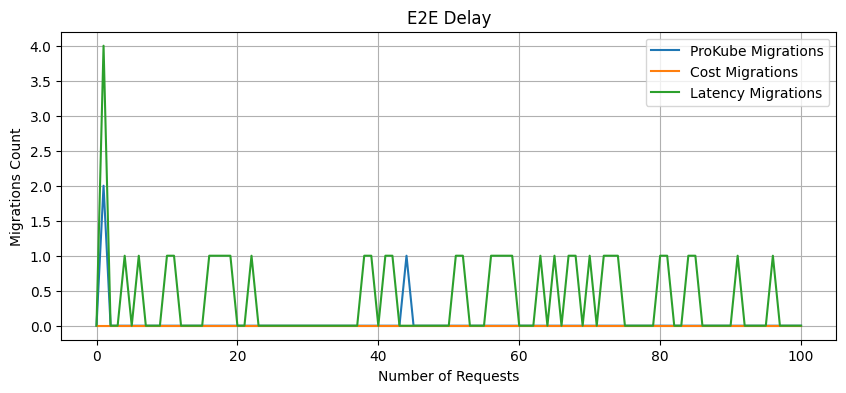

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df4_prokube_server.index, df4_prokube_server['migrations'], label='ProKube Migrations')
plt.plot(df4_cost_server.index, df4_cost_server['migrations'], label='Cost Migrations')
plt.plot(df4_latency_server.index, df4_latency_server['migrations'], label='Latency Migrations')
plt.title('E2E Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Migrations Count')
plt.legend()
plt.grid(True)
#plt.ylim([0,2])
plt.show()

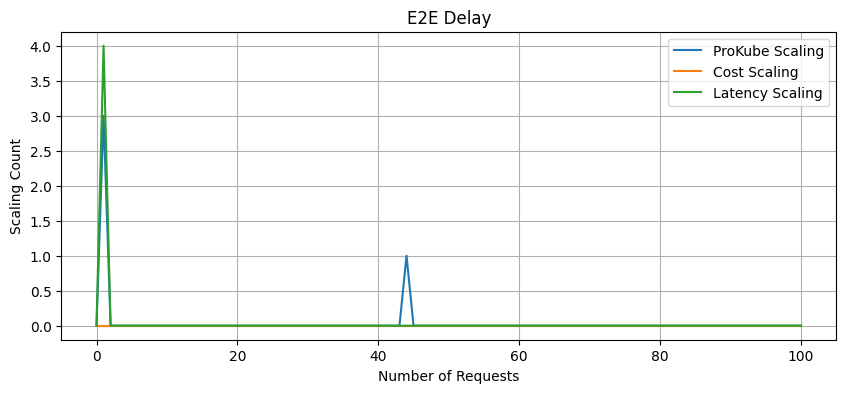

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df4_prokube_server.index, df4_prokube_server['scalings'], label='ProKube Scaling')
plt.plot(df4_cost_server.index, df4_cost_server['scalings'], label='Cost Scaling')
plt.plot(df4_latency_server.index, df4_latency_server['scalings'], label='Latency Scaling')

plt.title('E2E Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Scaling Count')
plt.legend()
plt.grid(True)
#plt.ylim([0,2])
plt.show()

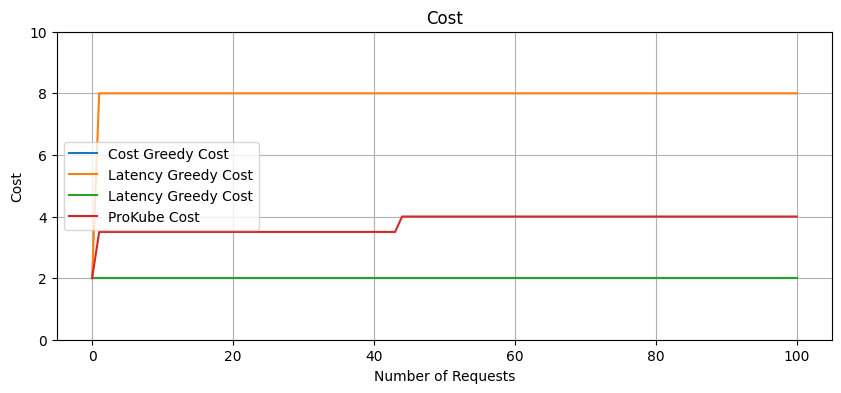

In [22]:
plt.figure(figsize=(10,4))
plt.plot(df4_cost_server.index, df4_cost_server['cost'], label='Cost Greedy Cost')
plt.plot(df4_latency_server.index, df4_latency_server['cost'], label='Latency Greedy Cost')
plt.plot(df4_gekube_server.index, df4_gekube_server['cost'], label='Latency Greedy Cost')
plt.plot(df4_prokube_server.index, df4_prokube_server['cost'], label='ProKube Cost')
plt.title('Cost')
plt.xlabel('Number of Requests')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.ylim([0,10])
plt.show()

In [31]:
df4_prokube_server['cost'].sum()/df4_prokube_server['cost'].count()

3.767326732673267

## Eight Containers

In [16]:
#column_names = ['Time',	'Model Name', 'File Name', 'Propagation Delay (s)', 'Processing Delay (ms)', 'E2E Delay (s)', 'location', 'core']

df8_prokube = pd.read_csv('eight_containers_75/ClientStat_1713524976.4174697.csv', header=None, names=column_names)
df8_costgreedy = pd.read_csv('eight_containers_75/ClientStat_1714059688.0958374_CostGreedy.csv', header=None, names=column_names)
df8_latencygreedy = pd.read_csv('eight_containers_75/ClientStat_1714070506.0299976_LatencyGreedy.csv', header=None, names=column_names)
df8_gekube = pd.read_csv('eight_containers_75/ClientStat_1720911232.967779_GeKube.csv', header=None, names=column_names)

print(f'Prokube: {df8_prokube.shape}, Cost: {df8_costgreedy.shape}, Latency: {df8_latencygreedy.shape}, {df8_gekube.shape}')


Prokube: (808, 8), Cost: (808, 8), Latency: (808, 8), (808, 8)


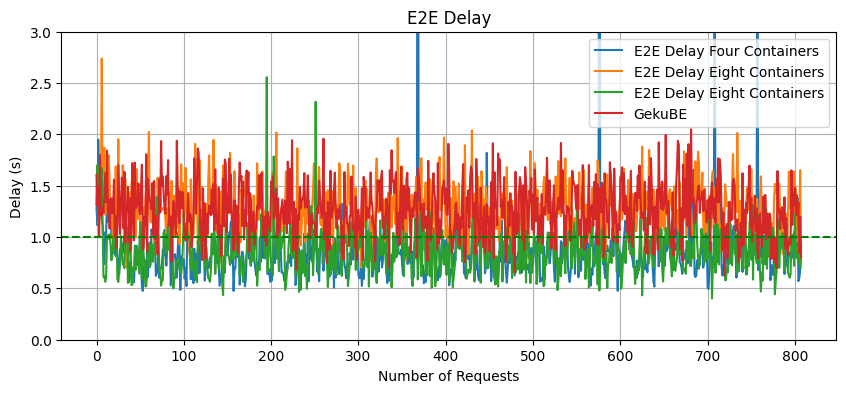

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df8_prokube.index, df8_prokube['E2E Delay (s)'], label='E2E Delay Four Containers')
plt.plot(df8_costgreedy.index, df8_costgreedy['E2E Delay (s)'], label='E2E Delay Eight Containers')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['E2E Delay (s)'], label='E2E Delay Eight Containers')
plt.plot(df8_gekube.index, df8_gekube['E2E Delay (s)'], label='GekuBE')
plt.title('E2E Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Delay (s)')
plt.legend()
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
plt.savefig('paper-graphs/e2e_delay.pdf', format='pdf')
plt.show()



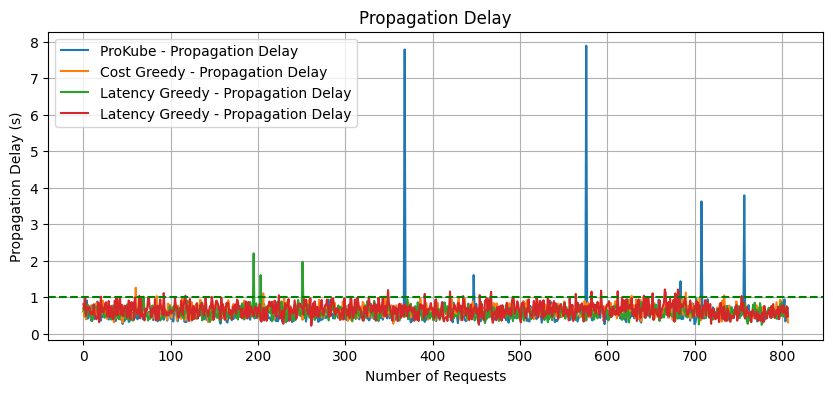

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [25]:
plt.figure(figsize=(10,4))
plt.plot(df8_prokube.index, df8_prokube['Propagation Delay (s)'], label='ProKube - Propagation Delay')
plt.plot(df8_costgreedy.index, df8_costgreedy['Propagation Delay (s)'], label='Cost Greedy - Propagation Delay')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['Propagation Delay (s)'], label='Latency Greedy - Propagation Delay')
plt.plot(df8_gekube.index, df8_gekube['Propagation Delay (s)'], label='Latency Greedy - Propagation Delay')
plt.title('Propagation Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Propagation Delay (s)')
plt.legend()
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
#plt.ylim([0,2])
plt.show()

plt.figure(figsize=(10,4))

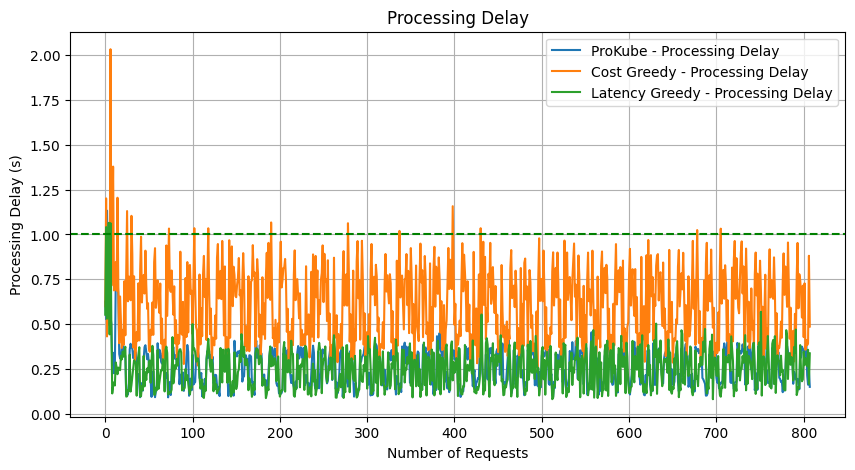

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df8_prokube.index, df8_prokube['Processing Delay (ms)']/1000, label='ProKube - Processing Delay')
plt.plot(df8_costgreedy.index, df8_costgreedy['Processing Delay (ms)']/1000, label='Cost Greedy - Processing Delay')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['Processing Delay (ms)']/1000, label='Latency Greedy - Processing Delay')
plt.title('Processing Delay')
plt.xlabel('Number of Requests')
plt.ylabel('Processing Delay (s)')
plt.legend()
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
#plt.ylim([0,2])
plt.show()

plt.figure(figsize=(10,4))

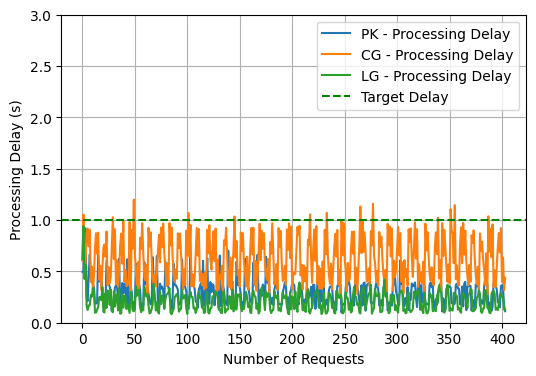

In [68]:
plt.figure(figsize=(6,4))

plt.plot(df4_prokube.index, df4_prokube['Processing Delay (ms)']/1000, label='PK - Processing Delay')
plt.plot(df4_costgreedy.index, df4_costgreedy['Processing Delay (ms)']/1000, label='CG - Processing Delay')
plt.plot(df4_latencygreedy.index, df4_latencygreedy['Processing Delay (ms)']/1000, label='LG - Processing Delay')
plt.ylabel('Processing Delay (s)')
plt.xlabel('Number of Requests')
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
#plt.title('Four Contianer Processing Delay')
plt.savefig('paper-graphs/processing_four.pdf', format='pdf')
plt.legend(loc='upper right')

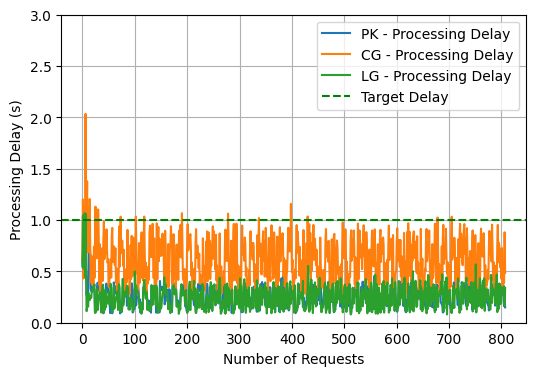

In [69]:
plt.figure(figsize=(6,4))
plt.plot(df8_prokube.index, df8_prokube['Processing Delay (ms)']/1000, label='PK - Processing Delay')
plt.plot(df8_costgreedy.index, df8_costgreedy['Processing Delay (ms)']/1000, label='CG - Processing Delay')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['Processing Delay (ms)']/1000, label='LG - Processing Delay')
plt.ylabel('Processing Delay (s)')
plt.xlabel('Number of Requests')
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
#plt.title('Eight Contianer Processing Delay')
plt.savefig('paper-graphs/processing_eight.pdf', format='pdf')
plt.legend(loc='upper right')

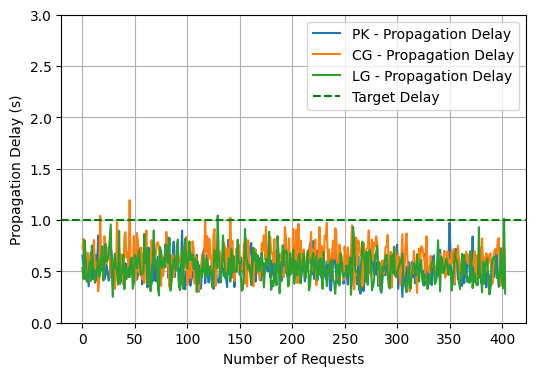

In [70]:
# Subplot 2: Propagation Delay
plt.figure(figsize=(6,4))
plt.plot(df4_prokube.index, df4_prokube['Propagation Delay (s)'], label='PK - Propagation Delay')
plt.plot(df4_costgreedy.index, df4_costgreedy['Propagation Delay (s)'], label='CG - Propagation Delay')
plt.plot(df4_latencygreedy.index, df4_latencygreedy['Propagation Delay (s)'], label='LG - Propagation Delay')
plt.ylabel('Propagation Delay (s)')
plt.xlabel('Number of Requests')
#ax2.set_ylim([0,20])
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
plt.savefig('paper-graphs/propagation_four.pdf', format='pdf')
plt.legend(loc='upper right')



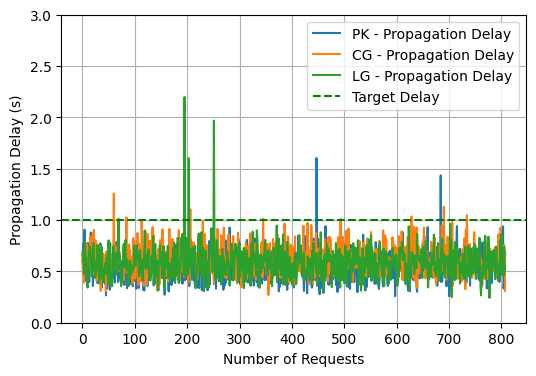

In [71]:
plt.figure(figsize=(6,4))
plt.plot(df8_prokube.index, df8_prokube['Propagation Delay (s)'], label='PK - Propagation Delay')
plt.plot(df8_costgreedy.index, df8_costgreedy['Propagation Delay (s)'], label='CG - Propagation Delay')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['Propagation Delay (s)'], label='LG - Propagation Delay')
plt.ylabel('Propagation Delay (s)')
plt.xlabel('Number of Requests')
#ax2.set_ylim([0,20])
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
plt.savefig('paper-graphs/propagation_eight.pdf', format='pdf')
plt.legend(loc='upper right')

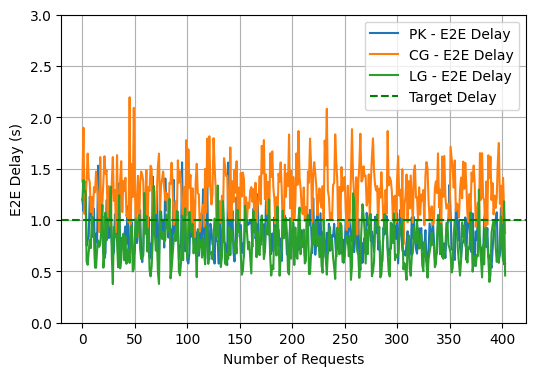

In [72]:
plt.figure(figsize=(6,4))
plt.plot(df4_prokube.index, df4_prokube['E2E Delay (s)'], label='PK - E2E Delay')
plt.plot(df4_costgreedy.index, df4_costgreedy['E2E Delay (s)'], label='CG - E2E Delay')
plt.plot(df4_latencygreedy.index, df4_latencygreedy['E2E Delay (s)'], label='LG - E2E Delay')
plt.ylabel('E2E Delay (s)')
plt.xlabel('Number of Requests')
#ax2.set_ylim([0,20])
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
plt.savefig('paper-graphs/e2e_four.pdf', format='pdf')
plt.legend(loc='upper right')





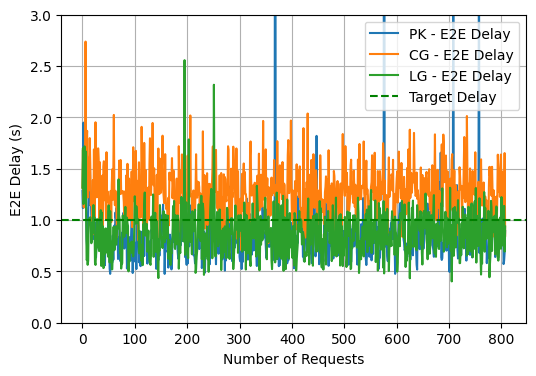

In [27]:
plt.figure(figsize=(6,4))
plt.plot(df8_prokube.index, df8_prokube['E2E Delay (s)'], label='PK - E2E Delay')
plt.plot(df8_costgreedy.index, df8_costgreedy['E2E Delay (s)'], label='CG - E2E Delay')
plt.plot(df8_latencygreedy.index, df8_latencygreedy['E2E Delay (s)'], label='LG - E2E Delay')
plt.ylabel('E2E Delay (s)')
plt.xlabel('Number of Requests')
#ax2.set_ylim([0,20])
plt.grid(True)
plt.axhline(y=1, color='g', linestyle='--', label='Target Delay')
plt.ylim([0,3])
plt.savefig('paper-graphs/e2e_eight.pdf', format='pdf')
plt.legend(loc='upper right')

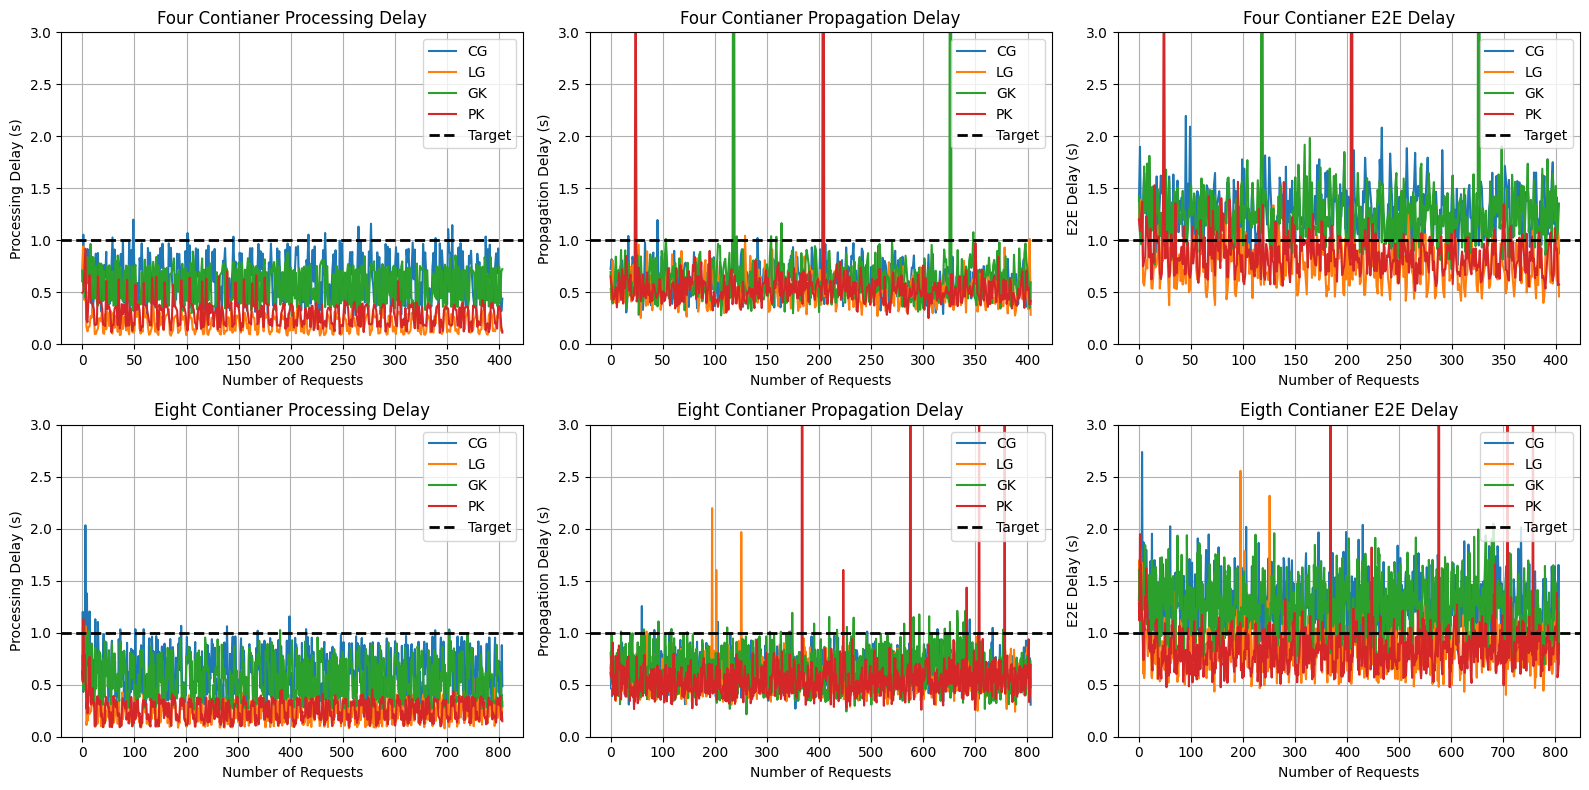

In [28]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))

#ax1.plot(inf_time5.index, inf_time5, label='Inference Time 500m', marker='o')
#ax1.plot(inf_time1.index, inf_time1, label='Inference Time 1 Core', marker='o')
#ax1.plot(proc_time5.index, proc_time5, marker='o', label='500m Core')

# Processing Delay
ax1.plot(df4_costgreedy.index, df4_costgreedy['Processing Delay (ms)']/1000, label='CG')
ax1.plot(df4_latencygreedy.index, df4_latencygreedy['Processing Delay (ms)']/1000, label='LG')
ax1.plot(df4_gekube.index, df4_gekube['Processing Delay (ms)']/1000, label='GK')
ax1.plot(df4_prokube.index, df4_prokube['Processing Delay (ms)']/1000, label='PK')
ax1.set_ylabel('Processing Delay (s)')
ax1.set_xlabel('Number of Requests')
ax1.grid(True)
ax1.axhline(y=1, color='black', linewidth=2, linestyle='--', label='Target')
ax1.set_ylim([0,3])
ax1.set_title('Four Contianer Processing Delay')
ax1.legend(loc='upper right')


ax4.plot(df8_costgreedy.index, df8_costgreedy['Processing Delay (ms)']/1000, label='CG')
ax4.plot(df8_latencygreedy.index, df8_latencygreedy['Processing Delay (ms)']/1000, label='LG')
ax4.plot(df8_gekube.index, df8_gekube['Processing Delay (ms)']/1000, label='GK')
ax4.plot(df8_prokube.index, df8_prokube['Processing Delay (ms)']/1000, label='PK')
ax4.set_ylabel('Processing Delay (s)')
ax4.set_xlabel('Number of Requests')
ax4.grid(True)
ax4.axhline(y=1, color='black', linewidth=2, linestyle='--', label='Target')
ax4.set_ylim([0,3])
ax4.set_title('Eight Contianer Processing Delay')
ax4.legend(loc='upper right')

# Subplot 2: Propagation Delay

ax2.plot(df4_costgreedy.index, df4_costgreedy['Propagation Delay (s)'], label='CG')
ax2.plot(df4_latencygreedy.index, df4_latencygreedy['Propagation Delay (s)'], label='LG')
ax2.plot(df4_gekube.index, df4_gekube['Propagation Delay (s)'], label='GK')
ax2.plot(df4_prokube.index, df4_prokube['Propagation Delay (s)'], label='PK')
ax2.set_ylabel('Propagation Delay (s)')
ax2.set_xlabel('Number of Requests')
#ax2.set_ylim([0,20])
ax2.grid(True)
ax2.axhline(y=1, color='black', linewidth=2, linestyle='--', label='Target')
ax2.set_ylim([0,3])
ax2.set_title('Four Contianer Propagation Delay')
ax2.legend(loc='upper right')


ax5.plot(df8_costgreedy.index, df8_costgreedy['Propagation Delay (s)'], label='CG')
ax5.plot(df8_latencygreedy.index, df8_latencygreedy['Propagation Delay (s)'], label='LG')
ax5.plot(df8_gekube.index, df8_gekube['Propagation Delay (s)'], label='GK')
ax5.plot(df8_prokube.index, df8_prokube['Propagation Delay (s)'], label='PK')
ax5.set_ylabel('Propagation Delay (s)')
ax5.set_xlabel('Number of Requests')
#ax2.set_ylim([0,20])
ax5.grid(True)
ax5.axhline(y=1, color='black', linewidth=2, linestyle='--', label='Target')
ax5.set_ylim([0,3])
ax5.set_title('Eight Contianer Propagation Delay')
ax5.legend(loc='upper right')

# Subplot 2: E2E Delay

ax3.plot(df4_costgreedy.index, df4_costgreedy['E2E Delay (s)'], label='CG')
ax3.plot(df4_latencygreedy.index, df4_latencygreedy['E2E Delay (s)'], label='LG')
ax3.plot(df4_gekube.index, df4_gekube['E2E Delay (s)'], label='GK')
ax3.plot(df4_prokube.index, df4_prokube['E2E Delay (s)'], label='PK')
ax3.set_ylabel('E2E Delay (s)')
ax3.set_xlabel('Number of Requests')
#ax2.set_ylim([0,20])
ax3.grid(True)
ax3.axhline(y=1, color='black', linestyle='--', label='Target', linewidth=2)
ax3.set_ylim([0,3])
ax3.set_title('Four Contianer E2E Delay')
ax3.legend(loc='upper right')


ax6.plot(df8_costgreedy.index, df8_costgreedy['E2E Delay (s)'], label='CG')
ax6.plot(df8_latencygreedy.index, df8_latencygreedy['E2E Delay (s)'], label='LG')
ax6.plot(df8_gekube.index, df8_gekube['E2E Delay (s)'], label='GK')
ax6.plot(df8_prokube.index, df8_prokube['E2E Delay (s)'], label='PK')
ax6.set_ylabel('E2E Delay (s)')
ax6.set_xlabel('Number of Requests')
#ax2.set_ylim([0,20])
ax6.grid(True)
ax6.axhline(y=1, color='black', linestyle='--', label='Target', linewidth=2)
ax6.set_ylim([0,3])
ax6.set_title('Eigth Contianer E2E Delay')
ax6.legend(loc='upper right')

plt.subplots_adjust(wspace=0.3)
#plt.suptitle('Delays for Four and Eight Containers')

# Adjust layout
plt.tight_layout()
# Show plot
plt.savefig('paper-graphs/delays.pdf', format='pdf')
plt.show()

In [29]:
df4_costgreedy.shape

(404, 8)

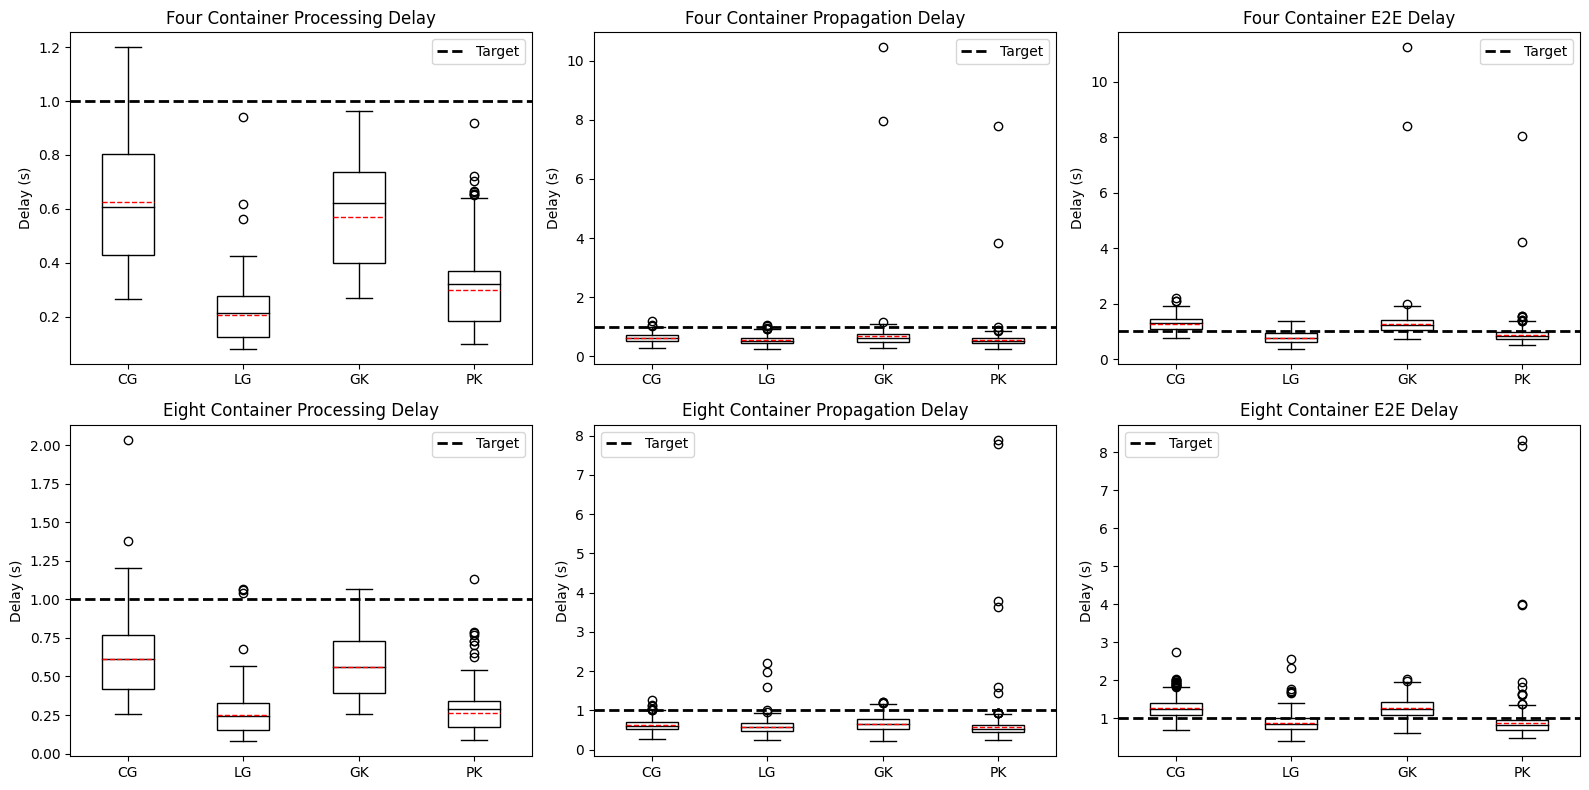

In [94]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))


def create_boxplot(ax, data, title, labels):
    #ax.boxplot(data, patch_artist=True, showmeans=True, meanline=True)
    boxprops = dict(facecolor='none', color='black')
    meanprops = dict(color='red')
    medianprops = dict( color='black')
    
    bp = ax.boxplot(data, patch_artist=True, showmeans=True, meanline=True,
                    boxprops=boxprops, meanprops=meanprops, medianprops=medianprops)
    
    ax.set_title(title)
    ax.set_ylabel('Delay (s)')
    ax.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Target')
    #ax.set_ylim([0, 3])
    ax.legend()
    ax.set_xticklabels(labels)

labels = ['CG', 'LG', 'GK', 'PK']
create_boxplot(ax1, [df4_costgreedy['Processing Delay (ms)']/1000, df4_latencygreedy['Processing Delay (ms)']/1000, df4_gekube['Processing Delay (ms)']/1000, df4_prokube['Processing Delay (ms)']/1000], 'Four Container Processing Delay', labels)
create_boxplot(ax2, [df4_costgreedy['Propagation Delay (s)'], df4_latencygreedy['Propagation Delay (s)'], df4_gekube['Propagation Delay (s)'], df4_prokube['Propagation Delay (s)']], 'Four Container Propagation Delay',labels)
create_boxplot(ax3, [df4_costgreedy['E2E Delay (s)'], df4_latencygreedy['E2E Delay (s)'], df4_gekube['E2E Delay (s)'], df4_prokube['E2E Delay (s)']], 'Four Container E2E Delay', labels)
create_boxplot(ax4, [df8_costgreedy['Processing Delay (ms)']/1000, df8_latencygreedy['Processing Delay (ms)']/1000, df8_gekube['Processing Delay (ms)']/1000, df8_prokube['Processing Delay (ms)']/1000], 'Eight Container Processing Delay',labels)
create_boxplot(ax5, [df8_costgreedy['Propagation Delay (s)'], df8_latencygreedy['Propagation Delay (s)'], df8_gekube['Propagation Delay (s)'], df8_prokube['Propagation Delay (s)']], 'Eight Container Propagation Delay', labels)
create_boxplot(ax6, [df8_costgreedy['E2E Delay (s)'], df8_latencygreedy['E2E Delay (s)'], df8_gekube['E2E Delay (s)'], df8_prokube['E2E Delay (s)']], 'Eight Container E2E Delay', labels)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('paper-graphs/delays.pdf', format='pdf')
plt.show()


In [43]:
sla_violation_rate_four = df4_prokube[df4_prokube['E2E Delay (s)']>1].count()/df4_prokube['E2E Delay (s)'].count()
sla_violation_rate_four

Time                     0.212871
Model Name               0.212871
File Name                0.212871
Propagation Delay (s)    0.212871
Processing Delay (ms)    0.212871
E2E Delay (s)            0.212871
location                 0.212871
core                     0.212871
dtype: float64

In [44]:
df8_prokube.head()

,Time,Model Name,File Name,Propagation Delay (s),Processing Delay (ms),E2E Delay (s),location,core
0,1.713525e+09,yolov5n,6.jpg,0.610512,624.904871,1.286460,europe-west3,500
1,1.713525e+09,yolov5n,6.jpg,0.573349,527.232409,1.116733,europe-west1,500
2,1.713525e+09,yolov5n,6.jpg,0.774497,1132.684946,1.948819,europe-west2,500
3,1.713525e+09,yolov5n,6.jpg,0.519040,784.868002,1.329914,europe-west9,500
4,1.713525e+09,yolov5n,6.jpg,0.907090,700.967312,1.653310,europe-west3,500


In [45]:
#df_four[df_four['E2E Delay (s)'] > 1].count()/ df_four['E2E Delay (s)'].count()

sla_violation_rate_eight = df8_prokube[df8_prokube['E2E Delay (s)']>1].count()/df8_prokube['E2E Delay (s)'].count()
sla_violation_rate_eight

Time                     0.194307
Model Name               0.194307
File Name                0.194307
Propagation Delay (s)    0.194307
Processing Delay (ms)    0.194307
E2E Delay (s)            0.194307
location                 0.194307
core                     0.194307
dtype: float64

In [46]:
sla_vio_rate_eight_half = df8_prokube[(df8_prokube['E2E Delay (s)'] > 1 ) & (df8_prokube['core'] == 500 )].count()/ df8_prokube[df8_prokube['core'] == 500].count()
sla_vio_rate_eight_half


Time                     1.0
Model Name               1.0
File Name                1.0
Propagation Delay (s)    1.0
Processing Delay (ms)    1.0
E2E Delay (s)            1.0
location                 1.0
core                     1.0
dtype: float64

In [28]:
sla_vio_rate_eight_one = df_eight_p75[(df_eight_p75['E2E Delay (s)'] > 1 ) & (df_eight_p75['core'] == 1000 )].count()/ df_eight_p75[df_eight_p75['core'] == 1000].count()
sla_vio_rate_eight_one


Time                     0.17803
Model Name               0.17803
File Name                0.17803
Propagation Delay (s)    0.17803
Processing Delay (ms)    0.17803
E2E Delay (s)            0.17803
location                 0.17803
core                     0.17803
dtype: float64

In [29]:
sla_vio_rate_eight_two = df_eight_p75[(df_eight_p75['E2E Delay (s)'] > 1 ) & (df_eight_p75['core'] == 2000 )].count()/ df_eight_p75[df_eight_p75['core'] == 2000].count()
sla_vio_rate_eight_two

Time                    NaN
Model Name              NaN
File Name               NaN
Propagation Delay (s)   NaN
Processing Delay (ms)   NaN
E2E Delay (s)           NaN
location                NaN
core                    NaN
dtype: float64

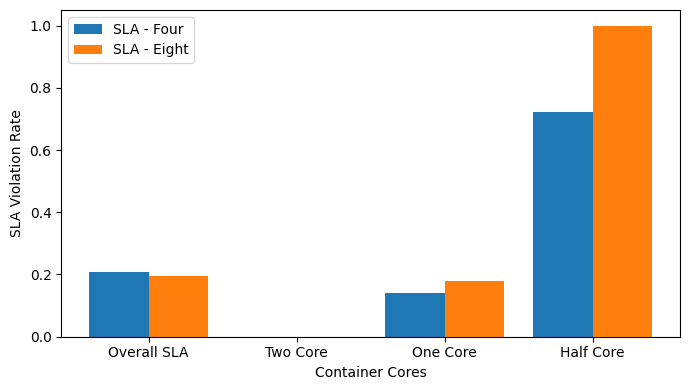

In [181]:
# Sample data (replace with your actual data)
containers = ['Four Containers', 'Eight Containers']
cores = ['Overall SLA', 'Two Core', 'One Core', 'Half Core']

# Overall SLA violation rates for different container configurations
overall_sla_rates = {
    'Four Containers': [sla_violation_rate_four[0], 0, sla_vio_rate_four_one[0], sla_vio_rate_four_half[0]],  # Replace with actual values
    'Eight Containers': [sla_violation_rate_eight[0], 0, sla_vio_rate_eight_one[0], sla_vio_rate_eight_half[0]]   # Replace with actual values
}

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

bar_width = 0.4
index = np.arange(len(cores))

# Plot bars for 4 Containers
bar1 = ax.bar(index, overall_sla_rates['Four Containers'], bar_width, label='SLA - Four')

# Plot bars for 8 Containers
bar2 = ax.bar(index + bar_width, overall_sla_rates['Eight Containers'], bar_width, label='SLA - Eight')

ax.set_xlabel('Container Cores')
ax.set_ylabel('SLA Violation Rate')
#ax.set_title('SLA Violation Rates for Four and Eight Containers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cores)
ax.legend()

plt.tight_layout()
plt.savefig('paper-graphs/sla_violation.pdf', format='pdf')
plt.show()


In [75]:
sla4_cost

Time                     0.846535
Model Name               0.846535
File Name                0.846535
Propagation Delay (s)    0.846535
Processing Delay (ms)    0.846535
E2E Delay (s)            0.846535
location                 0.846535
core                     0.846535
dtype: float64

In [76]:
sla4_latency

Time                     0.133663
Model Name               0.133663
File Name                0.133663
Propagation Delay (s)    0.133663
Processing Delay (ms)    0.133663
E2E Delay (s)            0.133663
location                 0.133663
core                     0.133663
dtype: float64

In [47]:
sla4_gekube

Time                     0.821782
Model Name               0.821782
File Name                0.821782
Propagation Delay (s)    0.821782
Processing Delay (ms)    0.821782
E2E Delay (s)            0.821782
location                 0.821782
core                     0.821782
dtype: float64

In [77]:
sla4_prokube

Time                     0.208955
Model Name               0.208955
File Name                0.208955
Propagation Delay (s)    0.208955
Processing Delay (ms)    0.208955
E2E Delay (s)            0.208955
location                 0.208955
core                     0.208955
dtype: float64

In [51]:
sla4_prokube = df4_prokube[df4_prokube['E2E Delay (s)'] > 1].count()/ df4_prokube['E2E Delay (s)'].count()
sla4_cost = df4_costgreedy[df4_costgreedy['E2E Delay (s)'] > 1].count()/ df4_costgreedy['E2E Delay (s)'].count()
sla4_latency = df4_latencygreedy[df4_latencygreedy['E2E Delay (s)'] > 1].count()/ df4_latencygreedy['E2E Delay (s)'].count()
sla4_gekube = df4_gekube[df4_gekube['E2E Delay (s)'] > 1].count()/ df4_gekube['E2E Delay (s)'].count()
print(f'Pro-SLA: {sla4_prokube}, Cost-SLA: {sla4_cost}, Latency-SLA: {sla4_latency}, {sla4_gekube}')

Pro-SLA: Time                     0.212871
Model Name               0.212871
File Name                0.212871
Propagation Delay (s)    0.212871
Processing Delay (ms)    0.212871
E2E Delay (s)            0.212871
location                 0.212871
core                     0.212871
dtype: float64, Cost-SLA: Time                     0.846535
Model Name               0.846535
File Name                0.846535
Propagation Delay (s)    0.846535
Processing Delay (ms)    0.846535
E2E Delay (s)            0.846535
location                 0.846535
core                     0.846535
dtype: float64, Latency-SLA: Time                     0.133663
Model Name               0.133663
File Name                0.133663
Propagation Delay (s)    0.133663
Processing Delay (ms)    0.133663
E2E Delay (s)            0.133663
location                 0.133663
core                     0.133663
dtype: float64, Time                     0.821782
Model Name               0.821782
File Name                0.821782
Pr

In [52]:
sla8_prokube = df8_prokube[df8_prokube['E2E Delay (s)'] > 1].count()/ df8_prokube['E2E Delay (s)'].count()
sla8_cost = df8_costgreedy[df8_costgreedy['E2E Delay (s)'] > 1].count()/ df8_costgreedy['E2E Delay (s)'].count()
sla8_latency = df8_latencygreedy[df8_latencygreedy['E2E Delay (s)'] > 1].count()/ df8_latencygreedy['E2E Delay (s)'].count()
sla8_gekube = df8_gekube[df8_gekube['E2E Delay (s)'] > 1].count()/ df8_gekube['E2E Delay (s)'].count()
print(f'Pro-SLA: {sla8_prokube}, Cost-SLA: {sla8_cost}, Latency-SLA: {sla8_latency}, {sla8_gekube}')

Pro-SLA: Time                     0.194307
Model Name               0.194307
File Name                0.194307
Propagation Delay (s)    0.194307
Processing Delay (ms)    0.194307
E2E Delay (s)            0.194307
location                 0.194307
core                     0.194307
dtype: float64, Cost-SLA: Time                     0.872525
Model Name               0.872525
File Name                0.872525
Propagation Delay (s)    0.872525
Processing Delay (ms)    0.872525
E2E Delay (s)            0.872525
location                 0.872525
core                     0.872525
dtype: float64, Latency-SLA: Time                     0.262376
Model Name               0.262376
File Name                0.262376
Propagation Delay (s)    0.262376
Processing Delay (ms)    0.262376
E2E Delay (s)            0.262376
location                 0.262376
core                     0.262376
dtype: float64, Time                     0.82797
Model Name               0.82797
File Name                0.82797
Propa

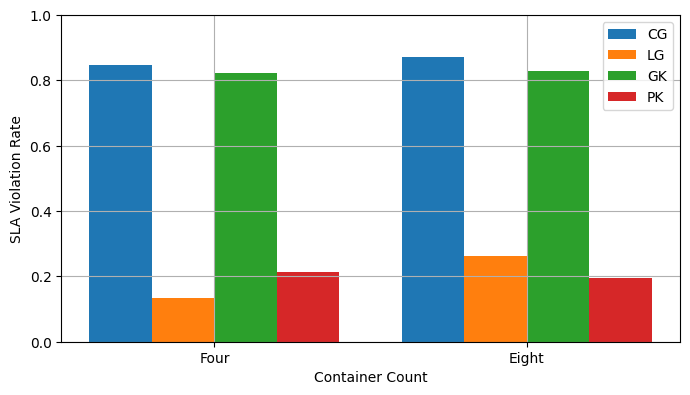

In [92]:
# Sample data (replace with your actual data)
models = ['CG', 'LG', 'GK', 'PK']
containers = ['Four', 'Eight']
overall_sla_rates = {
    'CG': [sla4_cost[0], sla8_cost[0]],  # Replace with actual values
    'LG': [sla4_latency[0], sla8_latency[0]],   # Replace with actual values
    'GK': [sla4_gekube[0], sla8_gekube[0]],  # Replace with actual values
    'PK': [sla4_prokube[0], sla8_prokube[0]],  # Replace with actual values
}

fig, ax = plt.subplots(figsize=(7, 4))

bar_width = 0.2
index = np.arange(len(containers))

for i, model in enumerate(models):
    bars = [overall_sla_rates[model][j] for j in range(len(containers))]
    ax.bar(index + i * bar_width, bars, bar_width, label=model)

ax.set_xlabel('Container Count')
ax.set_ylabel('SLA Violation Rate')
#ax.set_title('SLA Violation Rates for Different Models and Container Configurations')
ax.set_xticks(index +1.5* bar_width)  # Adjust the position of xticks
ax.set_xticklabels(containers)
ax.legend()

plt.tight_layout()
plt.grid(True)
plt.ylim([0,1])
plt.savefig('paper-graphs/sla_violation.pdf', format='pdf')

plt.show()


In [68]:
server_columns = ['migrations', 'scalings', 'cost']

In [69]:
df8_prokube_server = pd.read_csv('eight_containers_75/ServerStat_1713524976.4174697.csv', header=None, names=server_columns)
df8_cost_server = pd.read_csv('eight_containers_75/ServerStat_1714059688.0958374_CostGreedy.csv', header=None, names=server_columns)
df8_latency_server = pd.read_csv('eight_containers_75/ServerStat_1714070506.0299976_LatencyGreedy.csv', header=None, names=server_columns)
df8_gekube_server = pd.read_csv('eight_containers_75/ServerStat_1720911232.967779_GeKube.csv', header=None, names=server_columns)
print(f'Prokube: {df8_prokube_server.shape}, Cost: {df8_cost_server.shape}, Latency: {df8_latency_server.shape}, {df8_gekube_server.shape}')

Prokube: (101, 3), Cost: (101, 3), Latency: (101, 3), (101, 3)


In [71]:
df4_gekube_server.head()

,migrations,scalings,cost
0,0,0,2.0
1,3,0,2.0
2,0,0,2.0
3,0,0,2.0
4,0,0,2.0


In [73]:
df8_gekube_server.head()

,migrations,scalings,cost
0,0,0,4.0
1,3,0,4.0
2,0,0,4.0
3,0,0,4.0
4,0,0,4.0


In [74]:
pro8_migrations = round(df8_prokube_server['migrations'].sum()/df8_prokube_server['migrations'].count(),ndigits=2)
cost8_migrations = round(df8_cost_server['migrations'].sum()/df8_cost_server['migrations'].count(),ndigits=2)
latency8_migrations = round(df8_latency_server['migrations'].sum()/df8_latency_server['migrations'].count(),ndigits=2)
gekube8_migrations = round(df8_gekube_server['migrations'].sum()/df8_gekube_server['migrations'].count(),ndigits=2)

print(f'Pro-Migrations: {pro8_migrations}, Cost-Migrations: {cost8_migrations}, Latency-Migrations: {latency8_migrations}, {gekube8_migrations}')

Pro-Migrations: 0.06, Cost-Migrations: 0.0, Latency-Migrations: 0.13, 0.31


In [75]:
pro8_scalings = round(df8_prokube_server['scalings'].sum()/df8_prokube_server['scalings'].count(),ndigits=2)
cost8_scalings = round(df8_cost_server['scalings'].sum()/df8_cost_server['scalings'].count(),ndigits=2)
latency8_scalings = round(df8_latency_server['scalings'].sum()/df8_latency_server['scalings'].count(),ndigits=2)
gekube8_scalings = round(df8_gekube_server['scalings'].sum()/df8_gekube_server['scalings'].count(),ndigits=2)

print(f'Pro-Scalings: {pro8_scalings}, Cost-Scalings: {cost8_scalings}, Latency-Scalings: {latency8_scalings}, {gekube8_scalings}')

Pro-Scalings: 0.08, Cost-Scalings: 0.0, Latency-Scalings: 0.45, 0.0


In [76]:
pro8_cost = round(df8_prokube_server['cost'].sum()/df8_prokube_server['cost'].count(),ndigits=2)
cost8_cost = round(df8_cost_server['cost'].sum()/df8_cost_server['cost'].count(),ndigits=2)
latency8_cost = round(df8_latency_server['cost'].sum()/df8_latency_server['cost'].count(),ndigits=2)
gekube8_cost = round(df8_gekube_server['cost'].sum()/df8_gekube_server['cost'].count(),ndigits=2)
print(f'Pro-Cost: {pro8_cost}, Cost-Cost: {cost8_cost}, Latency-Cost: {latency8_cost}, {gekube8_cost}')

Pro-Cost: 7.94, Cost-Cost: 4.0, Latency-Cost: 12.71, 4.0


In [116]:
round(df_eight_server_p75['scalings'].sum()/df_eight_server_p75['scalings'].count(), ndigits=2)


0.08

In [118]:
round(df_eight_server_p75['cost'].sum()/df_eight_server_p75['cost'].count(), ndigits=2)

7.94

In [79]:
df_eight_server_p75

,migrations,scalings,cost
0,0,0,4.0
1,3,4,6.0
2,3,4,8.0
3,0,0,8.0
4,0,0,8.0
...,...,...,...
96,0,0,8.0
97,0,0,8.0
98,0,0,8.0
99,0,0,8.0


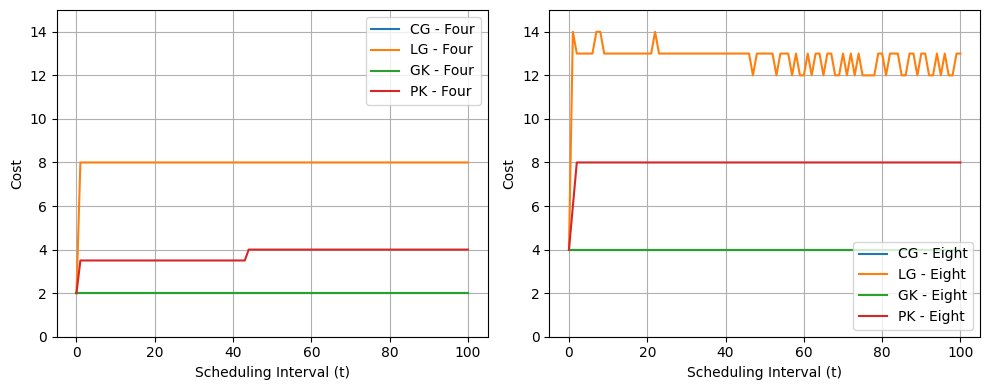

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#ax1.plot(inf_time5.index, inf_time5, label='Inference Time 500m', marker='o')
#ax1.plot(inf_time1.index, inf_time1, label='Inference Time 1 Core', marker='o')

ax1.plot(df4_cost_server.index, df4_cost_server['cost'], label='CG - Four')
ax1.plot(df4_latency_server.index, df4_latency_server['cost'], label='LG - Four')
ax1.plot(df4_gekube_server.index, df4_gekube_server['cost'], label='GK - Four')
ax1.plot(df4_prokube_server.index, df4_prokube_server['cost'], label='PK - Four')
ax1.set_ylabel('Cost')
ax1.set_xlabel('Scheduling Interval (t)')
ax1.grid(True)
ax1.legend()
ax1.set_ylim([0,15])

#plt.title('Processing Delay Three Cores')

# Subplot 2: E2E Delay
ax2.plot(df8_cost_server.index, df8_cost_server['cost'], label='CG - Eight')
ax2.plot(df8_latency_server.index, df8_latency_server['cost'], label='LG - Eight')
ax2.plot(df8_gekube_server.index, df8_gekube_server['cost'], label='GK - Eight')
ax2.plot(df8_prokube_server.index, df8_prokube_server['cost'], label='PK - Eight')
ax2.set_ylabel('Cost')
ax2.set_xlabel('Scheduling Interval (t)')
ax2.set_ylim([0,15])
ax2.grid(True)
ax2.legend(loc='lower right')

plt.subplots_adjust(wspace=0.3)
#plt.suptitle('Processing and E2E Delays Comparison for Yolov5n')
plt.grid(True)
# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('paper-graphs/cost.pdf')
plt.show()


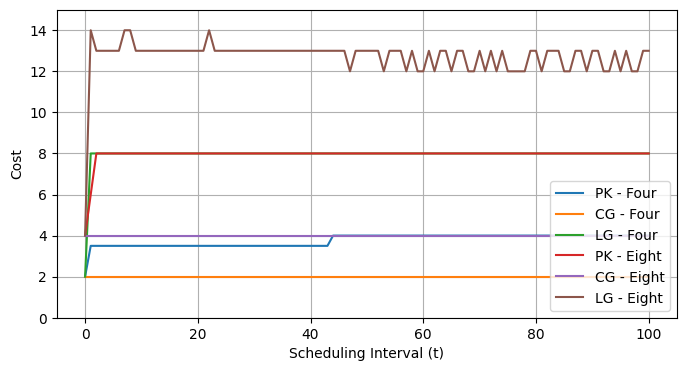

In [114]:
plt.figure(figsize=(8,4))
plt.plot(df4_prokube_server.index, df4_prokube_server['cost'], label='PK - Four')
plt.plot(df4_cost_server.index, df4_cost_server['cost'], label='CG - Four')
plt.plot(df4_latency_server.index, df4_latency_server['cost'], label='LG - Four')
plt.plot(df8_prokube_server.index, df8_prokube_server['cost'], label='PK - Eight')
plt.plot(df8_cost_server.index, df8_cost_server['cost'], label='CG - Eight')
plt.plot(df8_latency_server.index, df8_latency_server['cost'], label='LG - Eight')
#plt.title('Processing Delay')
plt.xlabel('Scheduling Interval (t)')
plt.ylabel('Cost')
#plt.legend()
plt.grid(True)
plt.ylim([0,15])
plt.legend(loc='lower right')
plt.savefig('paper-graphs/cost.pdf', format='pdf')
plt.show()

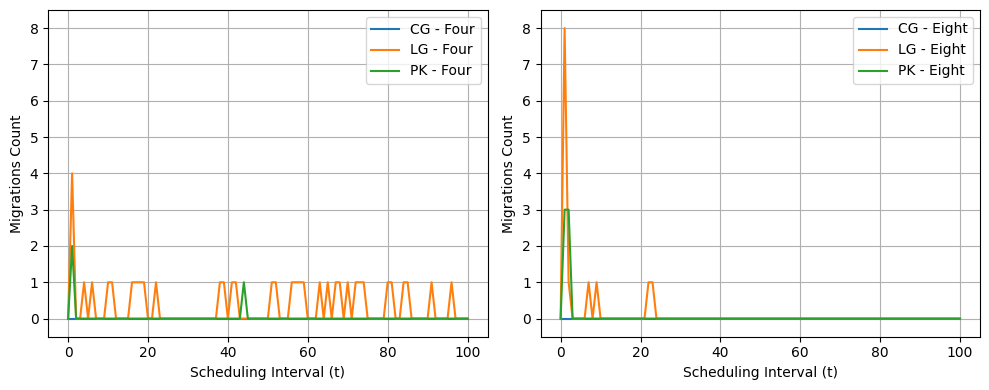

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.plot(df4_cost_server.index, df4_cost_server['migrations'], label='CG - Four')
ax1.plot(df4_latency_server.index, df4_latency_server['migrations'], label='LG - Four')
ax1.plot(df4_prokube_server.index, df4_prokube_server['migrations'], label='PK - Four')
ax1.set_ylabel('Migrations Count')
ax1.set_xlabel('Scheduling Interval (t)')
ax1.grid(True)
ax1.legend()
ax1.set_ylim([-0.5,8.5])


ax2.plot(df8_cost_server.index, df8_cost_server['migrations'], label='CG - Eight')
ax2.plot(df8_latency_server.index, df8_latency_server['migrations'], label='LG - Eight')
ax2.plot(df8_prokube_server.index, df8_prokube_server['migrations'], label='PK - Eight')
ax2.set_ylabel('Migrations Count')
ax2.set_xlabel('Scheduling Interval (t)')
ax2.set_ylim([-0.5,8.5])
ax2.grid(True)
ax2.legend()

plt.subplots_adjust(wspace=0.3)
#plt.suptitle('Processing and E2E Delays Comparison for Yolov5n')
plt.grid(True)
# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('paper-graphs/migrations.pdf')
plt.show()

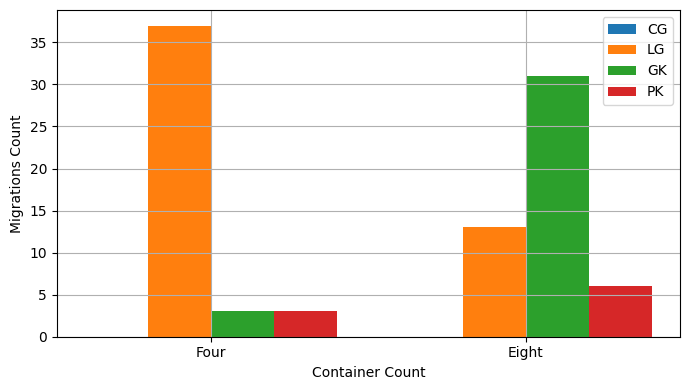

In [93]:
models = ['CG', 'LG', 'GK', 'PK']
containers = ['Four', 'Eight']
overall_sla_rates = {
    'CG': [df4_cost_server['migrations'].sum(), df8_cost_server['migrations'].sum()],  # Replace with actual values
    'LG': [df4_latency_server['migrations'].sum(), df8_latency_server['migrations'].sum()],   # Replace with actual values
    'GK': [df4_gekube_server['migrations'].sum(), df8_gekube_server['migrations'].sum()],  # Replace with actual values
    'PK': [df4_prokube_server['migrations'].sum(), df8_prokube_server['migrations'].sum()],  # Replace with actual values
}

fig, ax = plt.subplots(figsize=(7, 4))

bar_width = 0.2
index = np.arange(len(containers))

for i, model in enumerate(models):
    bars = [overall_sla_rates[model][j] for j in range(len(containers))]
    ax.bar(index + i * bar_width, bars, bar_width, label=model)

ax.set_xlabel('Container Count')
ax.set_ylabel('Migrations Count')
#ax.set_title('SLA Violation Rates for Different Models and Container Configurations')
ax.set_xticks(index +1.5* bar_width)  # Adjust the position of xticks
ax.set_xticklabels(containers)
ax.legend(loc='upper right')

plt.tight_layout()
plt.grid(True)
#plt.ylim([0,1])
plt.savefig('paper-graphs/migrations-bar.pdf', format='pdf')

plt.show()

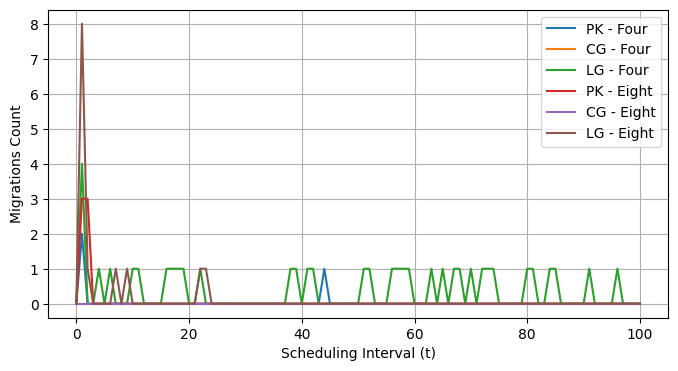

In [115]:
plt.figure(figsize=(8,4))
plt.plot(df4_prokube_server.index, df4_prokube_server['migrations'], label='PK - Four')
plt.plot(df4_cost_server.index, df4_cost_server['migrations'], label='CG - Four')
plt.plot(df4_latency_server.index, df4_latency_server['migrations'], label='LG - Four')
plt.plot(df8_prokube_server.index, df8_prokube_server['migrations'], label='PK - Eight')
plt.plot(df8_cost_server.index, df8_cost_server['migrations'], label='CG - Eight')
plt.plot(df8_latency_server.index, df8_latency_server['migrations'], label='LG - Eight')
#plt.title('E2E Delay')
plt.xlabel('Scheduling Interval (t)')
plt.ylabel('Migrations Count')
plt.legend()
plt.grid(True)
#plt.ylim([0,2])
plt.savefig('paper-graphs/migrations.pdf', format='pdf')
plt.show()

In [185]:
df_four_server['migrations']

0      0
1      2
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: migrations, Length: 101, dtype: int64

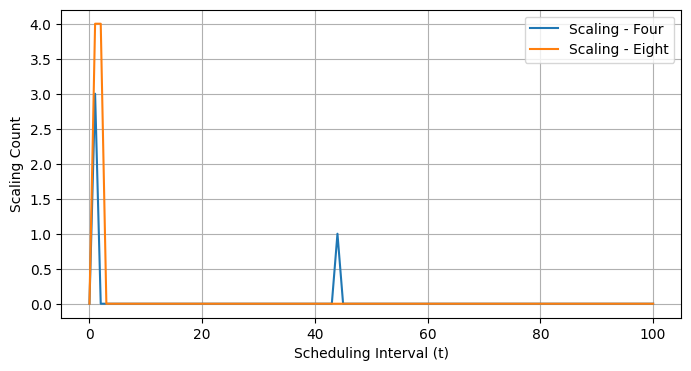

In [184]:
plt.figure(figsize=(8,4))
plt.plot(df_four_server.index, df_four_server['scalings'], label='Scaling - Four')
plt.plot(df_eight_server_p75.index, df_eight_server_p75['scalings'], label='Scaling - Eight')
#plt.title('E2E Delay')
plt.xlabel('Scheduling Interval (t)')
plt.ylabel('Scaling Count')
plt.legend()
plt.grid(True)
#plt.xlim([0,100])
plt.savefig('paper-graphs/scalings.pdf', format='pdf')
plt.show()

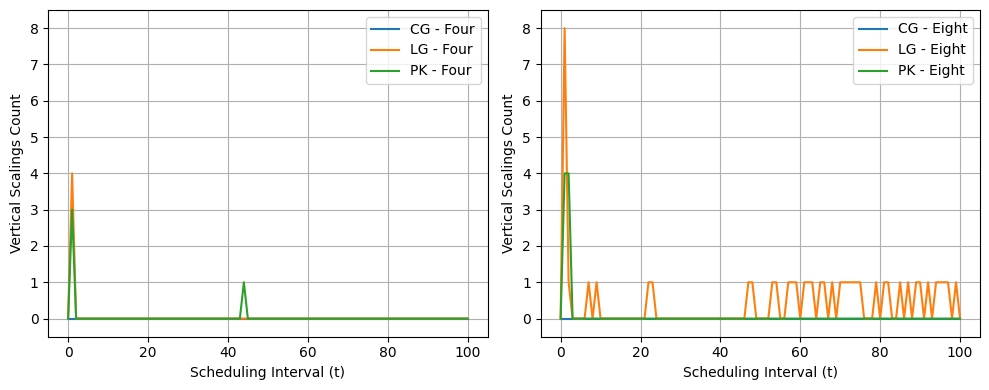

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.plot(df4_cost_server.index, df4_cost_server['scalings'], label='CG - Four')
ax1.plot(df4_latency_server.index, df4_latency_server['scalings'], label='LG - Four')
ax1.plot(df4_prokube_server.index, df4_prokube_server['scalings'], label='PK - Four')
ax1.set_ylabel('Vertical Scalings Count')
ax1.set_xlabel('Scheduling Interval (t)')
ax1.grid(True)
ax1.legend()
ax1.set_ylim([-0.5,8.5])

#plt.title('Processing Delay Three Cores')

# Subplot 2: E2E Delay

ax2.plot(df8_cost_server.index, df8_cost_server['scalings'], label='CG - Eight')
ax2.plot(df8_latency_server.index, df8_latency_server['scalings'], label='LG - Eight')
ax2.plot(df8_prokube_server.index, df8_prokube_server['scalings'], label='PK - Eight')
ax2.set_ylabel('Vertical Scalings Count')
ax2.set_xlabel('Scheduling Interval (t)')
ax2.set_ylim([-0.5,8.5])
ax2.grid(True)
ax2.legend()

plt.subplots_adjust(wspace=0.3)
#plt.suptitle('Processing and E2E Delays Comparison for Yolov5n')
plt.grid(True)
# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('paper-graphs/scalings.pdf')
plt.show()

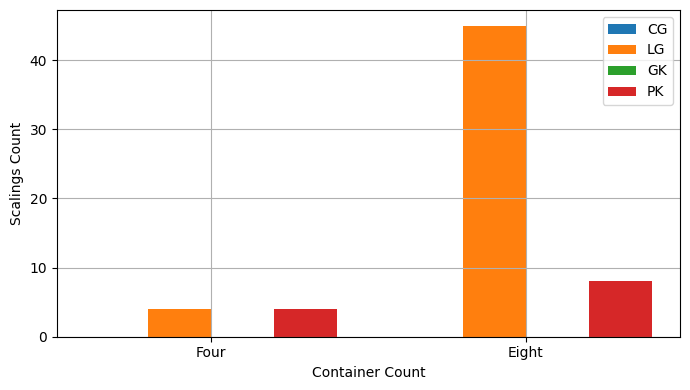

In [91]:
models = ['CG', 'LG', 'GK', 'PK']
containers = ['Four', 'Eight']
overall_sla_rates = {
    'CG': [df4_cost_server['scalings'].sum(), df8_cost_server['scalings'].sum()],  # Replace with actual values
    'LG': [df4_latency_server['scalings'].sum(), df8_latency_server['scalings'].sum()],   # Replace with actual values
    'GK': [df4_gekube_server['scalings'].sum(), df8_gekube_server['scalings'].sum()],  # Replace with actual values
    'PK': [df4_prokube_server['scalings'].sum(), df8_prokube_server['scalings'].sum()],  # Replace with actual values
}

fig, ax = plt.subplots(figsize=(7, 4))

bar_width = 0.2
index = np.arange(len(containers))

for i, model in enumerate(models):
    bars = [overall_sla_rates[model][j] for j in range(len(containers))]
    ax.bar(index + i * bar_width, bars, bar_width, label=model)

ax.set_xlabel('Container Count')
ax.set_ylabel('Scalings Count')
#ax.set_title('SLA Violation Rates for Different Models and Container Configurations')
ax.set_xticks(index +1.5* bar_width)  # Adjust the position of xticks
ax.set_xticklabels(containers)
ax.legend(loc='upper right')

plt.tight_layout()
plt.grid(True)
#plt.ylim([0,1])
plt.savefig('paper-graphs/scalings-bar.pdf', format='pdf')

plt.show()

In [99]:
df8_latency_server['scalings']

0      0
1      8
2      1
3      0
4      0
      ..
96     1
97     1
98     0
99     1
100    0
Name: scalings, Length: 101, dtype: int64

In [98]:
df8_latency_server['scalings'].sum()

45